In [109]:
# a supervised network to train MNIST written with mostly numpy
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
digits = load_digits()
In [68]: np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                 


# load the list of lists into a list :)
img_data = digits['images']
print(img_data[0], img_data.shape, sep='\n')

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(1797, 8, 8)


In [110]:
def sigmoid(z):
    sig = 1/(1 + np.exp(-z))
    return sig
    # z = wl*al[0] + b
    

7


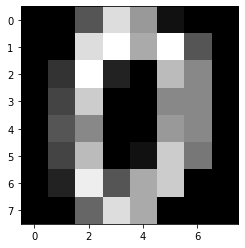

In [111]:
W = img_data[0].shape[0] # input shape, square
K = 2 # kernel/filter size
P = 0 # padding
S = 1 # stride
hidden_layer_shape = int(((W - K + 2*P)/S )+1)

print(hidden_layer_shape)
display = plt.imshow(img_data[0])
display.set_cmap('gray')

In [181]:
""" This is for convolutions... 
M = img_data[0]
# reshaping matrix into vector form for input layer
in_layer = np.asarray(M).reshape(-1)

# in_layer is the vectorized image, whose values are used as the activation of first layer
layer1_weights = np.random.rand(hidden_layer_shape)
conv = np.zeros([hidden_layer_shape, hidden_layer_shape])

M = M/np.max(M)

bias = -1/3

test = np.sum(M[0:2, 1:3])
print(test)


for i in range(0, hidden_layer_shape, S):
    for j in range(0, hidden_layer_shape, S):
        conv[i][j] = np.sum(M[i:i+K, j:j+K]) + bias

horiz_conv = np.array([np.sum(conv[i])/len(conv[i]) for i in range(len(conv))])
vert_conv = np.array([np.sum(i)/len(i) for i in M.transpose()])
out_layer_horiz = sigmoid(horiz_conv - 1)
out_layer_vert = sigmoid(vert_conv - 1)
out_layer = np.concatenate([out_layer_horiz, out_layer_vert])

print(out_layer)"""

'\nM = img_data[0]\n# reshaping matrix into vector form for input layer\nin_layer = np.asarray(M).reshape(-1)\n\n# in_layer is the vectorized image, whose values are used as the activation of first layer\nlayer1_weights = np.random.rand(hidden_layer_shape)\nconv = np.zeros([hidden_layer_shape, hidden_layer_shape])\n\nM = M/np.max(M)\n\nbias = -1/3\n\ntest = np.sum(M[0:2, 1:3])\nprint(test)\n\n\nfor i in range(0, hidden_layer_shape, S):\n    for j in range(0, hidden_layer_shape, S):\n        conv[i][j] = np.sum(M[i:i+K, j:j+K]) + bias\n\nhoriz_conv = np.array([np.sum(conv[i])/len(conv[i]) for i in range(len(conv))])\nvert_conv = np.array([np.sum(i)/len(i) for i in M.transpose()])\nout_layer_horiz = sigmoid(horiz_conv - 1)\nout_layer_vert = sigmoid(vert_conv - 1)\nout_layer = np.concatenate([out_layer_horiz, out_layer_vert])\n\nprint(out_layer)'

In [182]:
M = img_data[0]
# reshaping matrix into vector form for input layer
in_layer = np.asarray(M).reshape(-1)

# although previous cell has a some meaningful activation for the first hidden layer, it's laborious to compute
# instead, let's have some fun with the weights and biases.
# 7x64 weight matrix and 64x1 bias vector so that we can get some random, useless, but easily obtainable hidden layer.
# first hidden layer weights and biases
weightrix = np.random.rand(hidden_layer_shape, in_layer.shape[0])
bias_1 = np.random.rand(hidden_layer_shape)

#second hidden layer activation 
z_1 = np.matmul(weightrix, in_layer) + bias_1
hidden_layer_1 = sigmoid(z_1)

# 7x7 weight matrix and 7x1 bias vector so that we can get some random, useless, but easily obtainable hidden layer.
# second hidden layer weights and biases
weightrix_2 = np.random.rand(hidden_layer_shape, hidden_layer_1.shape[0])
bias_2 = np.random.rand(hidden_layer_1.shape[0])

# second hidden layer
z_2 = np.matmul(weightrix_2, hidden_layer_1) + bias_2
hidden_layer_2 = sigmoid(z_2)

# 10x7 weight matrix and 10x1 bias vector so that we can get some random, useless, but easily obtainable final layer.
# output layer's weights and biases
weightrix_3 = np.random.rand(10, hidden_layer_1.shape[0]) # 10 is the # of possible 'guesses'
bias_3 = np.random.rand(10)

# final output layer 
# transforming the 7x1 hidden layer with matrix multiplication to the 10x1 outlayer (10x7)(7x1) + (10x1) = out_layer
z_3 = np.matmul(weightrix_3, hidden_layer_2) + bias_3
out_layer = sigmoid(z_3)

print("layer shape in order:", in_layer.shape, hidden_layer_1.shape, hidden_layer_2.shape, out_layer.shape, sep='\n')

print("output\n", out_layer)

layer shape in order:
(64,)
(7,)
(7,)
(10,)
output
 [0.96420859 0.99269803 0.98498192 0.93095272 0.99327202 0.95424716
 0.99254699 0.99632671 0.99619529 0.97211265]


(10,)


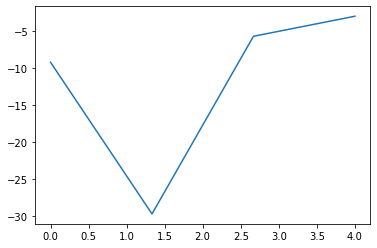

In [190]:
# back-propogation from output to input layer weights

#desired vector for identifying M, which is a 0
y = np.zeros(out_layer.shape[0])
y[0] = 1.0 # desired certainty is 1.0 for zero and 0.0 for all other nums

# matrix, each row is a layer
layers = np.array([out_layer, hidden_layer_2, hidden_layer_1, in_layer])
biases = np.array([bias_3, bias_2, bias_1])
weights = np.array([weightrix_3, weightrix_2, weightrix])

cost = np.square(out_layer - y)

print(cost.shape)

# first gradient
# change in cost with respect to the a change in current weight
dcost_dw = 2*(out_layer - y) * (-z_3*np.exp(-z_3)*np.power(1-np.exp(-z_3), -2)) * np.sum(hidden_layer_2) #dc_dav*dav_dz*dz_dw

# change in cost with respect to a change in the previous activation
dcost_davm1 = weightrix_3[:].sum()/len(weightrix[:]) * (-z_3*np.exp(-z_3)*np.power(1-np.exp(-z_3), -2)) * np.sum(hidden_layer_2) #dz_davm1*dav_dz*dz_dw

# change in cost with respect to a change in current bias
dcost_db = (-z_3*np.exp(-z_3)*np.power(1-np.exp(-z_3), -2)) * np.sum(hidden_layer_2) # dav_dz*dz_dw

# change in cost with respect to z
dcost_dz = -2*z_3*np.exp(-z_3)*( 1 + np.exp(-z_3) + y[i]*np.power(1 + np.exp(-z_3) , -2) ) # some extraneous calculus that maybe works


gradient_1 = np.squeeze(np.array([np.sum(dcost_dw), np.sum(dcost_davm1), np.sum(dcost_db), np.sum(dcost_dz)]))

#plt.plot(np.linspace(0, 10, 10), cost)

plt.plot(np.linspace(0,4,4), gradient_1)
